In [1]:
import re

import nltk

import pickle

import pprint
pp = pprint.PrettyPrinter(width=120, compact=True)

import numpy as np

import pandas as pd

from zipfile import ZipFile 

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\Subhadeep\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
file_name = "elon_tweets.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 


File Name                                             Modified             Size
elon_tweets.txt                                2018-11-30 01:46:26       292123
Extracting all the files now...
Done!


In [3]:
#Loading The Dataset into the List
list_tweets = []
for line in open('elon_tweets.txt', 'r'):
    list_tweets.append(line.strip())

print("The Length of the file :{}".format(len(list_tweets)))

The Length of the file :2819


In [4]:
#Loading First 10 lines of the dataset
for i in range(0, 10):
    print(list_tweets[i],'\n')

b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv' 

"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""" 

"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'" 

b'Stormy weather in Shortville ...' 

"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""" 

"b""@Lexxxzis It's just a helicopter in helicopter's clothing""" 

"b""@verge It won't matter""" 

b'@SuperCoolCube Pretty good' 

"b""Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?""" 

b'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation' 



# Cleaning the dataset

In [5]:
reviews = []
for tweet in list_tweets:
    #Removing all the hyper links
    # ^ means from start and $ means from last
     #Lower Casing
    tweet = tweet.lower()
    #Removing Http links
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    #Puntuation
    tweet = re.sub(r"\W"," ",tweet)
    #numbers
    tweet = re.sub(r"\d"," ",tweet)
    #Single alphabets 
    # ^ means from start and $ means from last
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    #Removing Extra useless data
    tweet = re.sub(r"http", "", tweet)
    tweet = re.sub(r"co", "", tweet)
    #Vaccent Spaces
    tweet = re.sub(r"\s+"," ",tweet)
    tweet = re.sub(r"^\s+"," ",tweet)
    tweet = re.sub(r"\s+$"," ",tweet)
    #Replacing Contraction with full words
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    reviews.append(tweet)

In [6]:
ps = PorterStemmer()
reviews = [ps.stem(word) for word in reviews]

In [7]:
#Loading First 10 lines of the dataset
for i in range(0, 10):
    pp.pprint(reviews[i])
    print()

' and so the robots spared humanity s jujqwfcv '

(' forin waltmossberg mims defn_ exactly tesla is absurdly overvalued if based on the past but that irr xe xa s '
 'qqctqkzgml ')

' waltmossberg mims defn_ et tu walt '

' stormy weather in shortville '

' daveleebbc verge al is dying due to nat gas fracking it basically dead '

' lexxxzis it just helipter in helipter clothing '

' verge it won matter '

' superolcube pretty good '

(' why did we waste so much time developing silly rockets damn you aliens so obtuse you have all this crazy tech but '
 'can speak english ')

(' technology breakthrough turns out chemtrails are actually message from time traveling aliens describing the secret '
 'of teleportation ')



In [8]:
#Converting the data to pandas dataframe
dataset = pd.DataFrame({'Reviwes':reviews})
print (dataset.head(10),'\n')
print(dataset.shape[0],'\n')
print(dataset.tail(10))

                                             Reviwes
0      and so the robots spared humanity s jujqwfcv 
1   forin waltmossberg mims defn_ exactly tesla i...
2                waltmossberg mims defn_ et tu walt 
3                      stormy weather in shortville 
4   daveleebbc verge al is dying due to nat gas f...
5    lexxxzis it just helipter in helipter clothing 
6                               verge it won matter 
7                           superolcube pretty good 
8   why did we waste so much time developing sill...
9   technology breakthrough turns out chemtrails ... 

2819 

                                                Reviwes
2809   his singing and acting talent will be sorely ...
2810   why does the crowd cry over the glorious lead...
2811   sam harris also wrote nice piece on the aweso...
2812   read lying the new book by my friend sam harr...
2813   am reading great biography of ben franklin by...
2814                   that was total non sequitur btw 
2815   great vol

In [9]:
#Droping the Null value coloum
dataset.isnull().sum()
#dataset.dropna(inplace=True)

Reviwes    0
dtype: int64

In [10]:
# Removing whitespace if any

blank = [] # start with an empty list

for i, rv in dataset.itertuples():    # iterating over the DataFrame
    if type(rv) == str:               # avoid NaN values
        if rv.isspace():              # test 'review' for whitespace
            blank.append(i)           # add matching index numbers to the list

print(len(blank))
print('Index location of Blanks: ',blank)


1
Index location of Blanks:  [2799]


In [11]:
#Droping the blank index locations
dataset.drop(blank, inplace=True, axis = 0)
print(len(dataset))

2818


In [12]:
#Tf - IDF Modelling
#tfidf = TfidfVectorizer(max_features = 450,
#                        min_df = 10, 
#                        max_df = 0.9,
#                        stop_words = stopwords.words('english'))
#X = tfidf.fit_transform(X).toarray()
#print(X.shape)

VADER's `SentimentIntensityAnalyzer()` takes in a string and returns a dictionary of scores in each of four categories:
* negative
* neutral
* positive
* compound *(computed by normalizing the scores above)*

# Testing VADER Model

In [13]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataset['Reviwes'][1154])

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [14]:
print(dataset['Reviwes'][1154])

 waltnew ol thanks 


# Adding New coloum with VADER Output

In [15]:
dataset['scores'] = dataset['Reviwes'].apply(lambda Reviwes: sid.polarity_scores(Reviwes))

dataset.head()

,Reviwes,scores
0,and so the robots spared humanity s jujqwfcv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,forin waltmossberg mims defn_ exactly tesla i...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,waltmossberg mims defn_ et tu walt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,stormy weather in shortville,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,daveleebbc verge al is dying due to nat gas f...,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'comp..."


In [16]:
dataset['compound']  = dataset['scores'].apply(lambda score_dict: score_dict['compound'])

dataset.head()

,Reviwes,scores,compound
0,and so the robots spared humanity s jujqwfcv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,forin waltmossberg mims defn_ exactly tesla i...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,waltmossberg mims defn_ et tu walt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,stormy weather in shortville,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,daveleebbc verge al is dying due to nat gas f...,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'comp...",-0.6486


In [17]:
dataset['comp_score'] = dataset['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

dataset.head()

,Reviwes,scores,compound,comp_score
0,and so the robots spared humanity s jujqwfcv,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,forin waltmossberg mims defn_ exactly tesla i...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,waltmossberg mims defn_ et tu walt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,stormy weather in shortville,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,daveleebbc verge al is dying due to nat gas f...,"{'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'comp...",-0.6486,neg


In [18]:
print(dataset['comp_score'].value_counts())
print(dataset.shape)

pos    2383
neg     435
Name: comp_score, dtype: int64
(2818, 4)


# Loading our Pretrained Model

In [19]:
#Vectorizer
with open('tfidfmodel.pickle', 'rb') as f:
    vectorizer = pickle.load(f)
    
#Model
with open('classifier.pickle', 'rb') as f:
    classifier = pickle.load(f)

In [20]:
total_pos = 0
total_neg = 0

for tweet in reviews:
    #Predicting The Reslts
    sent = classifier.predict(vectorizer.transform([tweet]).toarray())
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

In [24]:
print("Positive Reviews: {}".format(total_pos))
print("Negative Reviews: {}".format(total_neg))

#Accuracy
print("\n Accuracy score is {}%".format((total_pos / 2819)*100))

Positive Reviews: 1959
Negative Reviews: 860

 Accuracy score is 69.49272791770132%


# Plotting The Results

<h2>1. VADER Model Results</h2>

In [33]:
pos = 0
neg = 0
for i in dataset['comp_score']:
    if i == 'pos':
        pos += 1
    else:
        neg += 1
        
print(pos)
print(neg)

2383
435


Text(0.5,1,'Number of Postive and Negative Tweets')

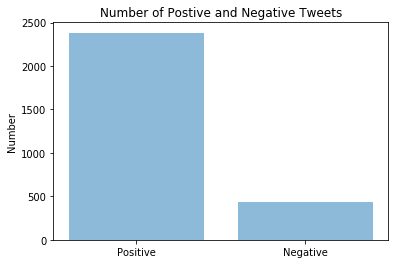

In [34]:
# Visualizing the results
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[pos, neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and Negative Tweets')

<h2>2. Pretrained Model Results</h2>

In [27]:
import matplotlib.pyplot as plt

Text(0.5,1,'Number of Postive and Negative Tweets')

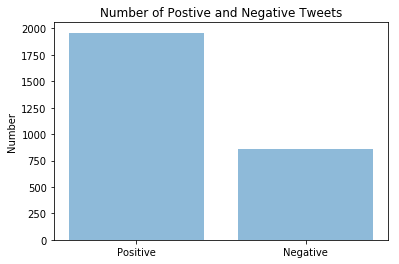

In [28]:
# Visualizing the results
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and Negative Tweets')